In [1]:
import folium
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
crash = pd.read_csv('./data/Crashes_in_DC.csv')

/Users/JosephNelson/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4,6,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
crash.head()

,X,Y,OBJECTID,CRIMEID,CCN,REPORTDATE,ROUTEID,MEASURE,OFFSET,STREETSEGID,...,BICYCLISTSIMPAIRED,DRIVERSIMPAIRED,TOTAL_TAXIS,TOTAL_GOVERNMENT,SPEEDING_INVOLVED,NEARESTINTROUTEID,NEARESTINTSTREETNAME,OFFINTERSECTION,INTAPPROACHDIRECTION,LOCERROR
0,-77.019666,38.951708,15657174,26624621,10058004,2010-04-30T05:00:00.000Z,1.10005e+07,4380.281,0.0,12560.0,...,0,0,0.0,0.0,0.0,11039062,GALLATIN ST NW,42.257043,South,NaN
1,-77.019899,38.971816,15657175,26623663,11055447,2011-04-23T05:00:00.000Z,1.10005e+07,6613.246,0.0,2801.0,...,0,0,0.0,0.0,0.0,11011572,ASPEN ST NW,59.400987,South,NaN
2,-77.018930,38.902528,15657176,26620620,12035156,2012-03-13T05:00:00.000Z,1.10005e+07,856.793,0.0,5717.0,...,0,0,0.0,0.0,0.0,11050892,K ST NW,0.034404,South,NaN
3,-77.018931,38.905480,15657177,26620125,11041528,2011-03-28T05:00:00.000Z,1.10005e+07,1184.453,0.0,6624.0,...,0,0,0.0,0.0,0.0,11057852,M ST NW,19.022755,South,NaN
4,-77.018931,38.905480,15657178,26620418,12035545,2012-03-14T05:00:00.000Z,1.10005e+07,1184.453,0.0,6624.0,...,0,0,0.0,0.0,0.0,11057852,M ST NW,23.776800,South,NaN


In [4]:
crash.columns

Index([u'X', u'Y', u'OBJECTID', u'CRIMEID', u'CCN', u'REPORTDATE', u'ROUTEID',
       u'MEASURE', u'OFFSET', u'STREETSEGID', u'ROADWAYSEGID', u'FROMDATE',
       u'TODATE', u'MARID', u'ADDRESS', u'LATITUDE', u'LONGITUDE', u'XCOORD',
       u'YCOORD', u'WARD', u'EVENTID', u'MAR_ADDRESS', u'MAR_SCORE',
       u'MAJORINJURIES_BICYCLIST', u'MINORINJURIES_BICYCLIST',
       u'UNKNOWNINJURIES_BICYCLIST', u'FATAL_BICYCLIST',
       u'MAJORINJURIES_DRIVER', u'MINORINJURIES_DRIVER',
       u'UNKNOWNINJURIES_DRIVER', u'FATAL_DRIVER', u'MAJORINJURIES_PEDESTRIAN',
       u'MINORINJURIES_PEDESTRIAN', u'UNKNOWNINJURIES_PEDESTRIAN',
       u'FATAL_PEDESTRIAN', u'TOTAL_VEHICLES', u'TOTAL_BICYCLES',
       u'TOTAL_PEDESTRIANS', u'PEDESTRIANSIMPAIRED', u'BICYCLISTSIMPAIRED',
       u'DRIVERSIMPAIRED', u'TOTAL_TAXIS', u'TOTAL_GOVERNMENT',
       u'SPEEDING_INVOLVED', u'NEARESTINTROUTEID', u'NEARESTINTSTREETNAME',
       u'OFFINTERSECTION', u'INTAPPROACHDIRECTION', u'LOCERROR'],
      dtype='object')

In [5]:
crash['REPORTDATE'] = pd.to_datetime(crash['REPORTDATE'])

In [6]:
ts = crash.set_index('REPORTDATE')

In [7]:
ts.sort_index()['MINORINJURIES_BICYCLIST'].groupby(ts.index.day)

In [8]:
ts.groupby(ts.index.year).sum()['MINORINJURIES_BICYCLIST']

1975.0      0.0
1989.0      0.0
1990.0      0.0
1991.0      0.0
1992.0      0.0
1993.0      0.0
1994.0      0.0
1995.0      0.0
1996.0      0.0
1997.0      0.0
1998.0      0.0
1999.0      0.0
2000.0      0.0
2001.0      0.0
2002.0      0.0
2003.0      0.0
2004.0      0.0
2005.0      0.0
2006.0      0.0
2007.0      0.0
2008.0      0.0
2009.0      0.0
2010.0      0.0
2011.0      0.0
2012.0      0.0
2013.0      0.0
2014.0      0.0
2015.0    101.0
2016.0    431.0
2017.0    182.0
2025.0      0.0
Name: MINORINJURIES_BICYCLIST, dtype: float64

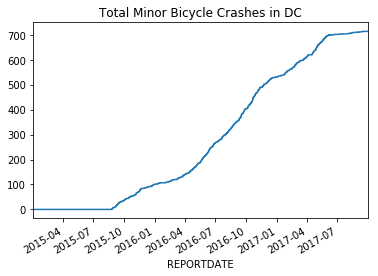

In [9]:
ts.sort_index()['MINORINJURIES_BICYCLIST'].drop('NaT')['2015':'2017'].cumsum().plot(title='Total Minor Bicycle Crashes in DC')


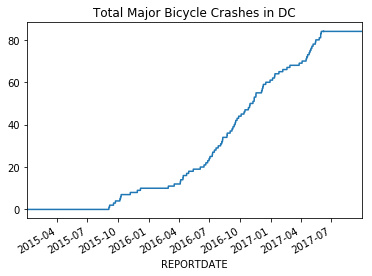

In [10]:
# major accidents
ts.sort_index()['MAJORINJURIES_BICYCLIST'].drop('NaT')['2015':'2017'].cumsum().plot(title='Total Major Bicycle Crashes in DC')


In [11]:
# major accidents?
crash[crash['MAJORINJURIES_BICYCLIST'] > 0].shape[0]

85

In [12]:
crash[crash['MINORINJURIES_BICYCLIST'] > 0].shape[0]

710

In [13]:
crash[crash['BICYCLISTSIMPAIRED'] > 0].shape[0]

10

In [14]:
crash[crash['MINORINJURIES_BICYCLIST'] > 0][['X', 'Y']].values

array([[-77.01892776,  38.91246754],
       [-77.01989787,  38.97223571],
       [-77.01893065,  38.91472173],
       ..., 
       [         nan,          nan],
       [-77.03273451,  38.93053417],
       [-77.03216749,  38.94393463]])

In [15]:
bike_data = crash[crash['MINORINJURIES_BICYCLIST'] > 0]

In [16]:
crash[crash['MINORINJURIES_BICYCLIST'] > 0].isnull().sum()

X                               1
Y                               1
OBJECTID                        0
CRIMEID                         0
CCN                             0
REPORTDATE                      0
ROUTEID                         1
MEASURE                         1
OFFSET                          1
STREETSEGID                     1
ROADWAYSEGID                    1
FROMDATE                        0
TODATE                        710
MARID                           0
ADDRESS                         0
LATITUDE                        0
LONGITUDE                       0
XCOORD                          0
YCOORD                          0
WARD                            0
EVENTID                         0
MAR_ADDRESS                    36
MAR_SCORE                       0
MAJORINJURIES_BICYCLIST         0
MINORINJURIES_BICYCLIST         0
UNKNOWNINJURIES_BICYCLIST       0
FATAL_BICYCLIST                 0
MAJORINJURIES_DRIVER            0
MINORINJURIES_DRIVER            0
UNKNOWNINJURIE

In [17]:
# show that null value
crash[crash['MINORINJURIES_BICYCLIST'] > 0][crash[crash['MINORINJURIES_BICYCLIST'] > 0].isnull()['X'] == True]

,X,Y,OBJECTID,CRIMEID,CCN,REPORTDATE,ROUTEID,MEASURE,OFFSET,STREETSEGID,...,BICYCLISTSIMPAIRED,DRIVERSIMPAIRED,TOTAL_TAXIS,TOTAL_GOVERNMENT,SPEEDING_INVOLVED,NEARESTINTROUTEID,NEARESTINTSTREETNAME,OFFINTERSECTION,INTAPPROACHDIRECTION,LOCERROR
139823,NaN,NaN,15794925,27348662,17106978,2017-06-23 16:44:20,NaN,NaN,NaN,NaN,...,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [18]:
# drop that null value
data = crash[crash['MINORINJURIES_BICYCLIST'] > 0].drop(139823)[['X', 'Y']].values

In [19]:
m = folium.Map(location=[38.9072, -77.0369], zoom_start=12)

In [20]:
# add to map one-by-one
for i in range(0,len(data)):
    folium.Marker(location=[data[i][1], data[i][0]],
                  icon=folium.Icon(color='red'),
                  
                 ).add_to(m)

In [21]:
m

In [22]:
ts[:'2017'][ts[:'2017']['MINORINJURIES_BICYCLIST'] > 0]

,X,Y,OBJECTID,CRIMEID,CCN,ROUTEID,MEASURE,OFFSET,STREETSEGID,ROADWAYSEGID,...,BICYCLISTSIMPAIRED,DRIVERSIMPAIRED,TOTAL_TAXIS,TOTAL_GOVERNMENT,SPEEDING_INVOLVED,NEARESTINTROUTEID,NEARESTINTSTREETNAME,OFFINTERSECTION,INTAPPROACHDIRECTION,LOCERROR
REPORTDATE,,,,,,,,,,,,,,,,,,,,,
2016-08-30 15:21:37,-77.018928,38.912468,15657369,27049602,16146045,1.10005e+07,1960.169,0.0,11534.0,20471.0,...,0,0,0.0,1.0,0.0,11074162,R ST NW,22.352832,South,NaN
2016-10-19 13:35:36,-77.019898,38.972236,15657376,27099523,16177665,1.10005e+07,6659.880,0.0,2801.0,3378.0,...,0,0,0.0,0.0,0.0,11011572,ASPEN ST NW,13.003048,South,NaN
2016-12-17 10:47:15,-77.018931,38.914722,15657385,27158543,16212655,1.10005e+07,2210.410,0.0,6120.0,14538.0,...,1,0,0.0,0.0,0.0,11036722,FLORIDA AVE NW,28.246378,West,NaN
2017-05-17 17:57:03,-77.018928,38.908945,15657433,27311813,17082537,1.10005e+07,1569.110,62.0,491.0,868.0,...,0,0,0.0,0.0,0.0,11065842,O ST NW,44.506757,North,NaN
2017-05-08 03:12:14,-77.019728,38.953072,15657494,27301912,17076210,1.10005e+07,4531.766,4.0,12279.0,12581.0,...,0,0,0.0,0.0,0.0,11042902,HAMILTON ST NW,7.974331,South,NaN
2016-01-09 13:57:38,-77.019903,38.913043,15657600,26815579,16004595,1.10006e+07,2326.843,0.0,8948.0,9498.0,...,0,0,0.0,0.0,0.0,11075462,RHODE ISLAND AVE NW,0.044531,North,NaN
2016-09-16 21:16:33,-77.017702,38.918274,15656794,27066763,16157142,1.10004e+07,2688.946,0.0,9566.0,10283.0,...,0,0,0.0,0.0,0.0,11088462,V ST NW,12.464699,South,NaN
2016-02-22 23:04:48,-77.018931,38.902921,15657125,26859794,16027144,1.10005e+07,900.379,5.0,4323.0,35837.0,...,0,0,0.0,0.0,0.0,11050892,K ST NW,43.635916,North,NaN
2015-11-28 11:39:14,-77.019202,38.942060,15657142,26773572,15189434,1.10005e+07,3431.134,0.0,5877.0,3057.0,...,0,0,0.0,0.0,0.0,11088012,UPSHUR ST NW,0.049594,North,NaN


In [23]:
data16 = ts['2016'][ts['2016']['MINORINJURIES_BICYCLIST'] > 0][['X', 'Y']].values

In [24]:
data17 = ts['2017':][ts['2017':]['MINORINJURIES_BICYCLIST'] > 0].drop(139823)[['X', 'Y']].values

In [25]:
len(data16)

430

In [26]:
len(data17)

182

In [27]:
crash1617 = folium.Map(location=[38.9072, -77.0369], zoom_start=12)

In [28]:
# add to map one-by-one
for i in range(0,len(data16)):
    folium.Marker(location=[data[i][1], data[i][0]],
                  icon=folium.Icon(color='blue'),
                  popup='2016',
                 ).add_to(crash1617)

In [29]:
# add to map one-by-one
for i in range(0,len(data17)):
    folium.Marker(location=[data[i][1], data[i][0]],
                  icon=folium.Icon(color='red'),
                  popup='2017',
                 ).add_to(crash1617)

In [30]:
crash1617